In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
#import pandas_profiling
from pydantic_settings import BaseSettings
%matplotlib inline
df = pd.read_csv('framingham.csv')

/var/folders/3_/gjvvhtcd3ds_yszgm7r1r4fh0000gn/T/ipykernel_24927/3651101966.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['BPMeds'].fillna(0, inplace = True)
/var/folders/3_/gjvvhtcd3ds_yszgm7r1r4fh0000gn/T/ipykernel_24927/3651101966.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behav

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

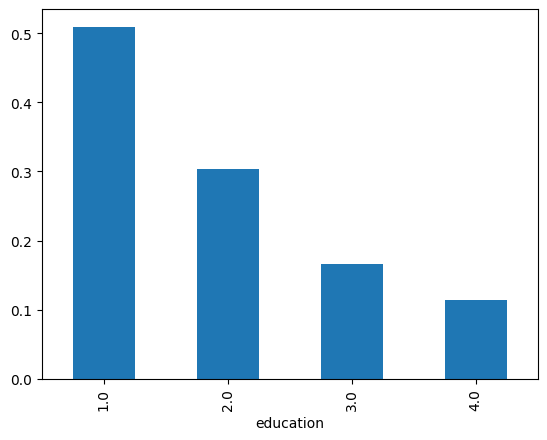

In [3]:
df['TenYearCHD'].value_counts(normalize = True)
df['cigsPerDay'].value_counts(normalize = True).plot(kind="bar")
df['cigsPerDay'][df['currentSmoker']==0].isna().sum()
# creating a boolean array of smokers
smoke = (df['currentSmoker']==1)
# applying mean to NaNs in cigsPerDay but using a set of smokers only
df.loc[smoke,'cigsPerDay'] = df.loc[smoke,'cigsPerDay'].fillna(df.loc[smoke,'cigsPerDay'].mean())
df['cigsPerDay'][df['currentSmoker']==1].mean()
df['cigsPerDay'][df['currentSmoker']==0].mean()
df['education'].value_counts(normalize = True).plot(kind="bar")
# Filling out missing values
df['BPMeds'].fillna(0, inplace = True)
df['glucose'].fillna(df.glucose.mean(), inplace = True)
df['totChol'].fillna(df.totChol.mean(), inplace = True)
df['education'].fillna(1, inplace = True)
df['BMI'].fillna(df.BMI.mean(), inplace = True)
df['heartRate'].fillna(df.heartRate.mean(), inplace = True)
df.isna().sum()

In [4]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# separate independent & dependent variables
X = df.iloc[:,0:14]  #independent columns
y = df.iloc[:,-1]    #target column i.e price range

# apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=11)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(11,'Score'))  #print 10 best features

              Specs       Score
10            sysBP  727.935535
1               age  319.266019
9           totChol  235.502392
4        cigsPerDay  209.897040
11            diaBP  152.748563
7      prevalentHyp   92.048736
8          diabetes   39.144944
5            BPMeds   30.759595
0              male   18.899930
6   prevalentStroke   16.109887
12              BMI   15.227367


In [5]:
featureScores = featureScores.sort_values(by='Score', ascending=False)
featureScores

,Specs,Score
10,sysBP,727.935535
1,age,319.266019
9,totChol,235.502392
4,cigsPerDay,209.897040
11,diaBP,152.748563
7,prevalentHyp,92.048736
8,diabetes,39.144944
5,BPMeds,30.759595
0,male,18.899930
6,prevalentStroke,16.109887


/var/folders/3_/gjvvhtcd3ds_yszgm7r1r4fh0000gn/T/ipykernel_24927/2876043360.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Specs', y='Score', data=featureScores, palette = "GnBu_d")


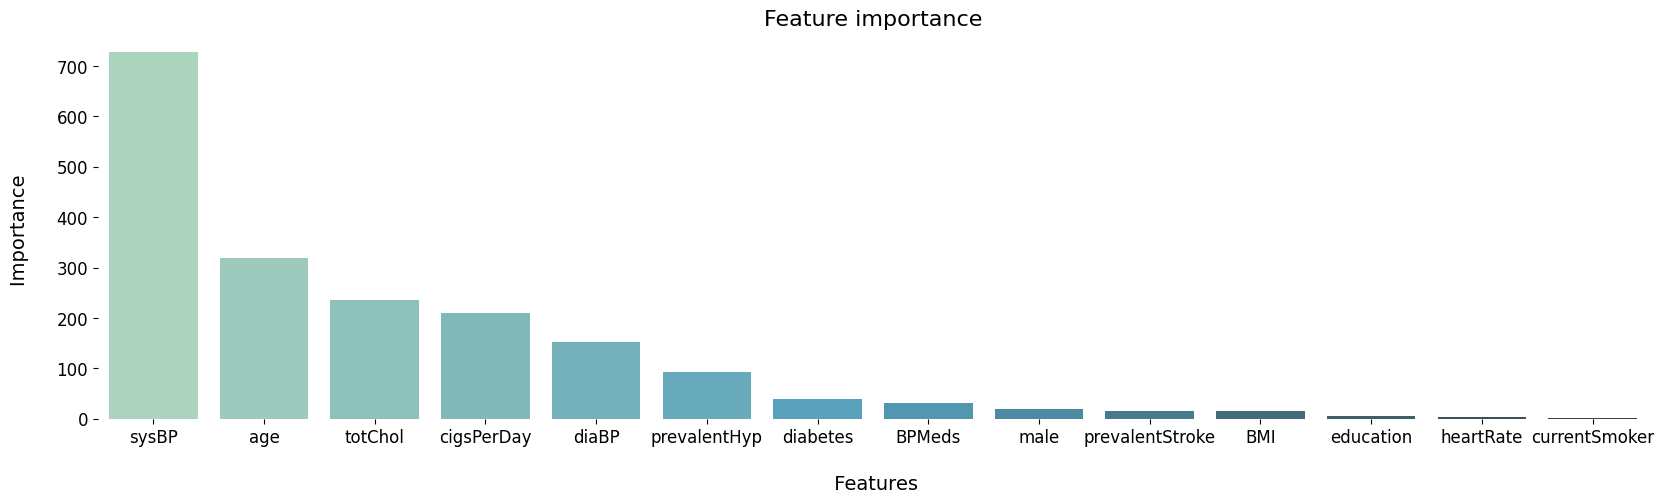

In [6]:
# visualizing feature selection
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,5))
sns.barplot(x='Specs', y='Score', data=featureScores, palette = "GnBu_d")
plt.box(False)
plt.title('Feature importance', fontsize=16)
plt.xlabel('\n Features', fontsize=14)
plt.ylabel('Importance \n', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [7]:
features_list = featureScores["Specs"].tolist()[:13]
features_list

['sysBP',
 'age',
 'totChol',
 'cigsPerDay',
 'diaBP',
 'prevalentHyp',
 'diabetes',
 'BPMeds',
 'male',
 'prevalentStroke',
 'BMI',
 'education',
 'heartRate']

In [8]:
df = df[['sysBP','age','totChol','cigsPerDay','diaBP','TenYearCHD']]
df.head()

,sysBP,age,totChol,cigsPerDay,diaBP,TenYearCHD
0,106.0,39,195.0,0.0,70.0,0
1,121.0,46,250.0,0.0,81.0,0
2,127.5,48,245.0,20.0,80.0,0
3,150.0,61,225.0,30.0,95.0,1
4,130.0,46,285.0,23.0,84.0,0


In [9]:
from sklearn.model_selection import train_test_split

y = df['TenYearCHD'] #target variable
X = df.drop(['TenYearCHD'], axis = 1) #features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(3392, 5) (3392,)
(848, 5) (848,)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import datasets, linear_model
from imblearn.pipeline import Pipeline
from sklearn.svm import SVC
from imblearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold
# decision tree  on imbalanced dataset with SMOTE oversampling and random undersampling
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
import sklearn.linear_model as lm

# fit a model
# lm = lm.LogisticRegression()
# model = lm.fit(X_train, y_train)
# over = SMOTE(sampling_strategy=0.1)
# steps = [('over', over), ('model', model)]
# pipeline = Pipeline(steps=steps)
# X, y = make_classification(n_samples=10000, n_features=5, n_redundant=0,
# 	n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
# cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
# scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
# print(model.score(X_test, y_test))
# print('Mean ROC AUC: %.3f' % mean(scores))

model_orig = LogisticRegression(max_iter=1000)
model_orig.fit(X_train, y_train)
print("Original Model Accuracy (no SMOTE): ", model_orig.score(X_test, y_test))

over_sampler = SMOTE(sampling_strategy=1, random_state=1)

log_reg_model_pipeline = LogisticRegression(max_iter=1000)
smote_log_reg_pipeline = Pipeline(steps=[('over', over_sampler),
                                         ('model', log_reg_model_pipeline)])

cv_strategy = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
roc_auc_scores = cross_val_score(smote_log_reg_pipeline, X_train, y_train, scoring='roc_auc', cv=cv_strategy, n_jobs=-1)

print(f"Mean ROC AUC for Logistic Regression with SMOTE (no ensembling) (on X_train, via cross-validation): {mean(roc_auc_scores):.3f}")

Original Model Accuracy (no SMOTE):  0.8502358490566038
Mean ROC AUC for Logistic Regression with SMOTE (on X_train, via cross-validation): 0.722


In [14]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(random_state=1) # Added random_state for reproducibility
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
# from sklearn.metrics import classification_report, confusion_matrix # This line was commented out
# print(confusion_matrix(y_test, y_pred))
from sklearn.metrics import accuracy_score
print(f"Accuracy for Decision Tree (on X_test): {accuracy_score(y_test, y_pred, normalize=True):.3f}")


Accuracy for Decision Tree (on X_test): 0.751


In [15]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import accuracy_score
print(f"Accuracy for K-Nearest Neighbors (on X_test): {accuracy_score(y_test, y_pred, normalize=True):.3f}")

Accuracy for K-Nearest Neighbors (on X_test): 0.823


In [ ]:
# %%

# Voting Ensemble for Classification
from sklearn import model_selection # Already imported, but good to be explicit if used as model_selection.KFold
from sklearn.linear_model import LogisticRegression # Already imported
from sklearn.neighbors import KNeighborsClassifier # Imported in a previous cell
from sklearn.ensemble import VotingClassifier # Already imported
from imblearn.over_sampling import SMOTE # Already imported
from imblearn.pipeline import Pipeline # Already imported
from numpy import mean # Already imported
from sklearn.model_selection import RepeatedStratifiedKFold # Already imported

# Define the cross-validation strategy (using RepeatedStratifiedKFold for consistency)
# Using n_splits=5 as in your KFold, and n_repeats=3 as in your earlier CV.
cv_ensemble_strategy = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)

# Create the sub models (unfitted instances)
estimators_list = []
# Ensuring max_iter is set for LogisticRegression if dataset is complex or default is insufficient.
logistic_model_ensemble = LogisticRegression(max_iter=1000, random_state=1)
estimators_list.append(('logistic', logistic_model_ensemble))

knn_model_ensemble = KNeighborsClassifier(n_neighbors=3) # Your original was (n_neighbors=3)
estimators_list.append(('knn', knn_model_ensemble)) # Changed 'cart' to 'knn' for clarity, as it's KNN

# Create the ensemble model with the unfitted estimators
ensemble_clf = VotingClassifier(estimators=estimators_list)

# Define SMOTE strategy (can reuse over_sampler or define new if different params)
# Note: Ensure sampling_strategy=0.1 is appropriate for your data's imbalance.
smote_for_ensemble = SMOTE(sampling_strategy=1, random_state=1) # Added random_state

# Create the pipeline: SMOTE followed by the ensemble model
# The ensemble_clf (VotingClassifier) will internally fit its estimators.
smote_ensemble_pipeline = Pipeline(steps=[('smote', smote_for_ensemble), # Changed 'over' to 'smote' for clarity
                                          ('ensemble', ensemble_clf)]) # Changed 'model' to 'ensemble'

# Perform cross-validation on the training data (X_train, y_train)
# The default scoring for VotingClassifier is accuracy.
# If you want ROC AUC, specify scoring='roc_auc'.
# The original code printed results.mean() which usually implies accuracy for classifiers if not specified.
ensemble_cv_results = model_selection.cross_val_score(smote_ensemble_pipeline,
                                                      X_train,
                                                      y_train,
                                                      cv=cv_ensemble_strategy,
                                                      scoring='accuracy', # Explicitly stating accuracy
                                                      n_jobs=-1)

print(f"Mean cross-validation accuracy for SMOTE + Voting Ensemble (on X_train): {ensemble_cv_results.mean():.3f}")

# Optional: To train the final SMOTE + ensemble pipeline on all X_train and evaluate on X_test
smote_ensemble_pipeline.fit(X_train, y_train)
test_accuracy_ensemble = smote_ensemble_pipeline.score(X_test, y_test)
print(f"Test accuracy for SMOTE + Voting Ensemble (on X_test): {test_accuracy_ensemble:.3f}")

Mean cross-validation accuracy for SMOTE + Voting Ensemble (on X_train): 0.772
Test accuracy for SMOTE + Voting Ensemble (on X_test): 0.746


Exception ignored in: <function ResourceTracker.__del__ at 0x10706a8e0>
Traceback (most recent call last):
  File "/opt/homebrew/Cellar/python@3.13/3.13.3_1/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/homebrew/Cellar/python@3.13/3.13.3_1/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/homebrew/Cellar/python@3.13/3.13.3_1/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x10494e8e0>
Traceback (most recent call last):
  File "/opt/homebrew/Cellar/python@3.13/3.13.3_1/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/homebrew/Cellar/python@3.13/3.13.3_1/Frameworks/Python.frame

# ECE 228 Optimizations #

### Cleveland Dataset ###

In [17]:
!pip3 install liac-arff

  Preparing metadata (setup.py) ... done
  DEPRECATION: Building 'liac-arff' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'liac-arff'. Discussion can be found at https://github.com/pypa/pip/issues/6334
  Created wheel for liac-arff: filename=liac_arff-2.5.0-py3-none-any.whl size=11771 sha256=260d24c5d4dc523fb5571a2db9b19781257c9818210e86d49cd8d03abbc7ecb6
  Stored in directory: /Users/ashwinrohit/Library/Caches/pip/wheels/93/f3/5b/658a9bddee916a5f4b84bdc1a4e0fabd22fb17947c2c9542e6
Successfully built liac-arff


Exception ignored in: <function ResourceTracker.__del__ at 0x107ad28e0>
Traceback (most recent call last):
  File "/opt/homebrew/Cellar/python@3.13/3.13.3_1/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/homebrew/Cellar/python@3.13/3.13.3_1/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/homebrew/Cellar/python@3.13/3.13.3_1/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x1023228e0>
Traceback (most recent call last):
  File "/opt/homebrew/Cellar/python@3.13/3.13.3_1/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/homebrew/Cellar/python@3.13/3.13.3_1/Frameworks/Python.frame

In [15]:
import arff

def parse_arff_to_csv(arff_path, csv_path):
    with open(arff_path, 'r') as f:
        lines = f.readlines()

    data_start = False
    data = []
    columns = []

    for line in lines:
        line = line.strip()
        if line.lower().startswith('@attribute'):
            parts = line.split()
            if len(parts) >= 2:
                columns.append(parts[1])
        elif line.lower() == '@data':
            data_start = True
        elif data_start and line and not line.startswith('%'):
            data.append([x.strip() for x in line.split(',')])

    df = pd.DataFrame(data, columns=columns)
    df.replace('?', pd.NA, inplace=True)
    df = df.apply(pd.to_numeric, errors='ignore')
    df.to_csv(csv_path, index=False)
    print(f"Saved CSV to: {csv_path}")

In [16]:
parse_arff_to_csv('Cleveland/cleveland.dat', 'Cleveland/cleveland.csv')

Saved CSV to: Cleveland/cleveland.csv


/var/folders/yh/g8lsgn2s0z99hpcgxxf899dw0000gn/T/ipykernel_23936/1153347187.py:24: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')


In [17]:
column_names = [
    "age", "sex", "cp", "trestbps", "chol", "fbs", "restecg",
    "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"
]

# Load the parsed Cleveland dataset
df_cleveland = pd.read_csv('Cleveland/cleveland.csv', names=column_names, header=0)

# Ensure types are correct and handle missing values
df_cleveland = df_cleveland.replace('?', pd.NA)
df_cleveland = df_cleveland.apply(pd.to_numeric, errors='coerce')

### Heart + Disease Dataset ###

In [18]:
column_names = [
    "age", "sex", "cp", "trestbps", "chol", "fbs", "restecg",
    "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"
]

In [19]:
files = [
    "heart+disease/processed.cleveland.data",
    "heart+disease/reprocessed.hungarian.data",
    "heart+disease/processed.switzerland.data",
    "heart+disease/processed.va.data"
]

dfs = []

for file in files:
    df = pd.read_csv(file, header=None, names=column_names, na_values='?')
    dfs.append(df)

# Combine all
df_heart_disease = pd.concat(dfs, ignore_index=True)

In [20]:
# Shows lengths of the three datasets we use
print("Framingham: ", len(df))
print("Cleveland: ", len(df_cleveland))
print("Heart Disease: ", len(df_heart_disease))

Framingham:  200
Cleveland:  303
Heart Disease:  920


In [21]:
df_heart_disease.to_csv("heart_disease.csv", index=False)

Proportions in TenYearCHD column:
TenYearCHD
0    0.848113
1    0.151887
Name: proportion, dtype: float64


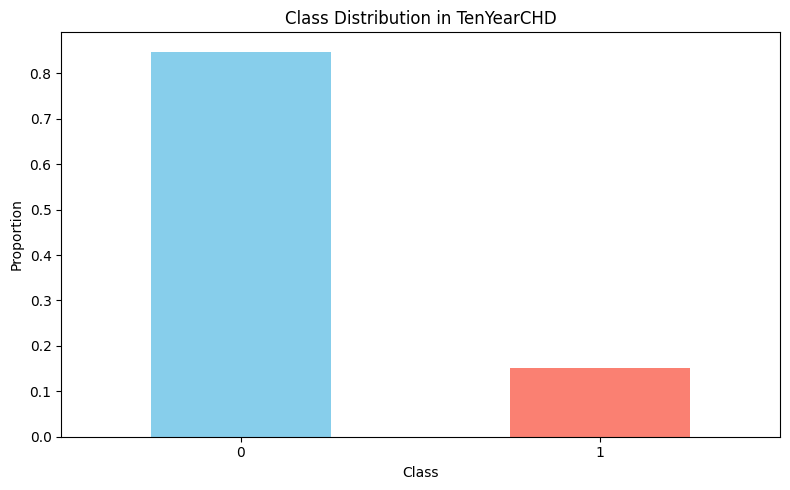

In [18]:
# Load the original framingham dataset
df_original = pd.read_csv('framingham.csv')

# Get the name of the last column
last_column = df_original.columns[-1]

# Calculate proportions of 0s vs 1s in the target column
target_proportions = df_original[last_column].value_counts(normalize=True)

# Print the proportions
print(f"Proportions in {last_column} column:")
print(target_proportions)

# Create a bar plot to visualize the class distribution
plt.figure(figsize=(8, 5))
target_proportions.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title(f'Class Distribution in {last_column}')
plt.xlabel('Class')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
import warnings

# Suppress warnings for cleaner output (optional)
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=UserWarning)


# Load the dataset
try:
    df = pd.read_csv('framingham.csv')
except FileNotFoundError:
    print("Error: 'framingham.csv' not found. Please ensure the file is in the correct directory.")
    exit()

# 1. Handle Missing Values: Replace with mean of the column
print("Handling missing values by mean imputation...")
for column in df.columns:
    if df[column].isnull().any():
        df[column] = df[column].fillna(df[column].mean())
print("Missing values handled.\n")

# 2. Prepare Data (Features and Target)
X = df.drop('TenYearCHD', axis=1)
y = df['TenYearCHD']
feature_names = X.columns

# 3. Split Data
# Stratify by y to maintain class proportion in train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 4. Scale Features
# Scaling is important for Logistic Regression, KNN, and for interpreting feature importances fairly
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert scaled arrays back to DataFrames for easier use and feature names
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=feature_names)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=feature_names)

# 5. Feature Importance
print("## Determining Most Important Features (using RandomForest):")
# Using RandomForestClassifier to find feature importances from the scaled training data
rf_model_fi = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_fi.fit(X_train_scaled_df, y_train)
importances = rf_model_fi.feature_importances_
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)
print(feature_importance_df)
print("\n" + "="*60 + "\n")

# 6. Logistic Regression without SMOTE
print("## Logistic Regression without SMOTE:")
log_reg_no_smote = LogisticRegression(random_state=42, solver='liblinear', max_iter=1000)
log_reg_no_smote.fit(X_train_scaled_df, y_train)
y_pred_lr_no_smote = log_reg_no_smote.predict(X_test_scaled_df)
accuracy_lr_no_smote = accuracy_score(y_test, y_pred_lr_no_smote)
print(f"Accuracy: {accuracy_lr_no_smote:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_lr_no_smote, zero_division=0))
print("\n" + "="*60 + "\n")

# 7. Ensembling (KNN and Logistic Regression) without SMOTE  <-- NEW SECTION
print("## Ensemble (Logistic Regression + KNN) without SMOTE:")
# KNN model trained on original (scaled) training data
knn_no_smote = KNeighborsClassifier(n_neighbors=5)
knn_no_smote.fit(X_train_scaled_df, y_train)

# Create a Voting Classifier using models trained on data without SMOTE
# log_reg_no_smote is already trained
ensemble_clf_no_smote = VotingClassifier(
    estimators=[('lr', log_reg_no_smote), ('knn', knn_no_smote)],
    voting='hard'
)

# Train the ensemble classifier on the original (scaled) training data
ensemble_clf_no_smote.fit(X_train_scaled_df, y_train)
# Evaluate the ensemble on the original (scaled) test set
y_pred_ensemble_no_smote = ensemble_clf_no_smote.predict(X_test_scaled_df)
accuracy_ensemble_no_smote = accuracy_score(y_test, y_pred_ensemble_no_smote)
print(f"Accuracy: {accuracy_ensemble_no_smote:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_ensemble_no_smote, zero_division=0))
print("\n" + "="*60 + "\n")

# 8. Apply SMOTE to the training data
print("Class distribution in original training data:")
print(y_train.value_counts())

smote = SMOTE(random_state=42)
# Apply SMOTE only on the training data (scaled)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled_df, y_train)

print("\nClass distribution in SMOTE'd training data:")
print(y_train_smote.value_counts()) # Should show balanced classes
print(f"Shape of training data before SMOTE: {X_train_scaled_df.shape}")
print(f"Shape of training data after SMOTE: {X_train_smote.shape}")
print("\n" + "="*60 + "\n")

# 9. Logistic Regression with SMOTE
print("## Logistic Regression with SMOTE:")
log_reg_smote = LogisticRegression(random_state=42, solver='liblinear', max_iter=1000)
log_reg_smote.fit(X_train_smote, y_train_smote) # Train on SMOTE'd data
# Evaluate on the original, un-SMOTE'd (but scaled) test set
y_pred_lr_smote = log_reg_smote.predict(X_test_scaled_df)
accuracy_lr_smote = accuracy_score(y_test, y_pred_lr_smote)
print(f"Accuracy: {accuracy_lr_smote:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_lr_smote, zero_division=0))
print("\n" + "="*60 + "\n")

# 10. Ensembling (KNN and Logistic Regression) with SMOTE
print("## Ensemble (Logistic Regression + KNN) with SMOTE:")
# KNN model trained on SMOTE'd (scaled) training data
knn_smote = KNeighborsClassifier(n_neighbors=5)
knn_smote.fit(X_train_smote, y_train_smote)

# Create a Voting Classifier using models trained on data with SMOTE
# log_reg_smote is already trained
ensemble_clf_smote = VotingClassifier(
    estimators=[('lr', log_reg_smote), ('knn', knn_smote)],
    voting='hard'
)

# Train the ensemble classifier on the SMOTE'd training data
ensemble_clf_smote.fit(X_train_smote, y_train_smote)
# Evaluate the ensemble on the original (scaled) test set
y_pred_ensemble_smote = ensemble_clf_smote.predict(X_test_scaled_df)
accuracy_ensemble_smote = accuracy_score(y_test, y_pred_ensemble_smote)
print(f"Accuracy: {accuracy_ensemble_smote:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_ensemble_smote, zero_division=0))
print("\n" + "="*60 + "\n")

# 11. Save the SMOTE-augmented training dataset
# This dataset consists of the scaled features from the SMOTE'd training set and the corresponding target variable.
# Create a DataFrame from the SMOTE'd training data (features)
X_train_smote_df_save = pd.DataFrame(X_train_smote, columns=feature_names)
# Create a Series for the SMOTE'd training data (target)
y_train_smote_series_save = pd.Series(y_train_smote, name='TenYearCHD')

# Concatenate features and target for the new CSV file
framingham_extended_df = pd.concat([X_train_smote_df_save, y_train_smote_series_save], axis=1)
try:
    framingham_extended_df.to_csv('framingham_extended.csv', index=False)
    print(f"SMOTE-augmented training dataset saved to 'framingham_extended.csv'")
    print(f"Shape of the extended dataset: {framingham_extended_df.shape}")
except Exception as e:
    print(f"Error saving 'framingham_extended.csv': {e}")

Handling missing values by mean imputation...
Missing values handled.

## Determining Most Important Features (using RandomForest):
            feature  importance
10            sysBP    0.130597
12              BMI    0.127503
1               age    0.126334
9           totChol    0.123492
14          glucose    0.118363
11            diaBP    0.110702
13        heartRate    0.095294
4        cigsPerDay    0.050460
2         education    0.041157
0              male    0.018898
7      prevalentHyp    0.018123
3     currentSmoker    0.012965
5            BPMeds    0.011895
8          diabetes    0.008236
6   prevalentStroke    0.005980


## Logistic Regression without SMOTE:
Accuracy: 0.8443
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.99      0.91       719
           1       0.41      0.05      0.10       129

    accuracy                           0.84       848
   macro avg       0.63      0.52      0.51       848
weig